In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score,  precision_score, recall_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
folder = 'ML-data-Central-Europe-gridded'

In [3]:
path = "O:/Climate-and-Energy-Policy/CERM/Projects/Wildfire/Data/" + folder  + "/"

In [4]:
N_SEED = 42
fire_season = True

if fire_season == True:
    # months to remove
    months = [1, 2, 3, 4, 5, 11, 12]
    season_name = 'fire-season'
else: 
    # months to remove
    months = [6, 7, 8, 9, 10]
    season_name = 'out-of-season'

### 1. Load dataset

In [5]:
dataset = pd.read_csv(path + '/ml_dataset_' + season_name + '.csv')

In [6]:
dataset

,id,ignit,mean_elev,north,east,west,slope30,road_den,pline_den,urban,...,irrigated,shrubland,grassland,other,temp,wind,rhum,prcp,prcp_sum_7day,prcp_sum_28day
0,3198.0,1,62.071857,0.405813,0.105250,0.141175,0.000013,1926.000000,0.000321,0.163200,...,0.0,0.290800,0.045400,0.028500,30.080353,11.834545,46.936417,0.000002,0.000331,0.249933
1,3198.0,1,62.071857,0.405813,0.105250,0.141175,0.000013,1926.000000,0.000321,0.163200,...,0.0,0.290800,0.045400,0.028500,23.805054,8.637403,43.126170,0.000000,0.006399,0.460110
2,3365.0,1,79.004539,0.381919,0.111675,0.135444,0.000106,1807.000000,0.000431,0.298500,...,0.0,0.217900,0.009100,0.013100,25.522370,14.535752,46.038418,0.000001,0.030568,0.273808
3,3859.0,1,31.601013,0.377481,0.127556,0.146206,0.000000,1506.000000,0.000292,0.018100,...,0.0,0.002600,0.065800,0.180500,21.569977,16.873781,56.378426,0.000392,0.000924,0.240471
4,4014.0,1,28.120051,0.408975,0.116569,0.117431,0.000000,1203.000000,0.000099,0.071400,...,0.0,0.279300,0.063000,0.003000,25.449127,8.360366,36.902447,0.000002,0.002489,0.092618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11271,6543.0,0,114.303181,0.383183,0.143425,0.149761,0.000180,2859.923089,0.000550,0.147657,...,0.0,0.011303,0.073058,0.035039,29.175934,3.427331,39.860860,0.000537,0.015666,0.344810
11272,15697.0,0,463.010280,0.434444,0.130950,0.106556,0.091744,852.446647,0.000235,0.000400,...,0.0,0.000000,0.180600,0.000000,28.402252,5.958509,41.162640,0.006697,0.019545,0.941452
11273,15680.0,0,306.004903,0.470794,0.132175,0.119856,0.002794,2197.943859,0.000522,0.114800,...,0.0,0.000000,0.024500,0.000500,17.164703,8.141712,77.010185,0.024511,0.073499,0.699566
11274,18599.0,0,-2.004469,0.399356,0.135756,0.139056,0.000000,492.000000,0.000504,0.027800,...,0.0,0.000000,0.009500,0.032400,19.884430,14.273962,70.823380,0.009971,0.040122,0.413073


In [7]:
X = dataset.iloc[:, 2:]
X

,mean_elev,north,east,west,slope30,road_den,pline_den,urban,forest,agricultur,irrigated,shrubland,grassland,other,temp,wind,rhum,prcp,prcp_sum_7day,prcp_sum_28day
0,62.071857,0.405813,0.105250,0.141175,0.000013,1926.000000,0.000321,0.163200,0.373700,0.09840,0.0,0.290800,0.045400,0.028500,30.080353,11.834545,46.936417,0.000002,0.000331,0.249933
1,62.071857,0.405813,0.105250,0.141175,0.000013,1926.000000,0.000321,0.163200,0.373700,0.09840,0.0,0.290800,0.045400,0.028500,23.805054,8.637403,43.126170,0.000000,0.006399,0.460110
2,79.004539,0.381919,0.111675,0.135444,0.000106,1807.000000,0.000431,0.298500,0.341600,0.11980,0.0,0.217900,0.009100,0.013100,25.522370,14.535752,46.038418,0.000001,0.030568,0.273808
3,31.601013,0.377481,0.127556,0.146206,0.000000,1506.000000,0.000292,0.018100,0.147200,0.58580,0.0,0.002600,0.065800,0.180500,21.569977,16.873781,56.378426,0.000392,0.000924,0.240471
4,28.120051,0.408975,0.116569,0.117431,0.000000,1203.000000,0.000099,0.071400,0.577100,0.00620,0.0,0.279300,0.063000,0.003000,25.449127,8.360366,36.902447,0.000002,0.002489,0.092618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11271,114.303181,0.383183,0.143425,0.149761,0.000180,2859.923089,0.000550,0.147657,0.345253,0.38769,0.0,0.011303,0.073058,0.035039,29.175934,3.427331,39.860860,0.000537,0.015666,0.344810
11272,463.010280,0.434444,0.130950,0.106556,0.091744,852.446647,0.000235,0.000400,0.571500,0.24750,0.0,0.000000,0.180600,0.000000,28.402252,5.958509,41.162640,0.006697,0.019545,0.941452
11273,306.004903,0.470794,0.132175,0.119856,0.002794,2197.943859,0.000522,0.114800,0.324200,0.53600,0.0,0.000000,0.024500,0.000500,17.164703,8.141712,77.010185,0.024511,0.073499,0.699566
11274,-2.004469,0.399356,0.135756,0.139056,0.000000,492.000000,0.000504,0.027800,0.035300,0.89500,0.0,0.000000,0.009500,0.032400,19.884430,14.273962,70.823380,0.009971,0.040122,0.413073


In [8]:
y = dataset.iloc[:, 1]
y

0        1
1        1
2        1
3        1
4        1
        ..
11271    0
11272    0
11273    0
11274    0
11275    0
Name: ignit, Length: 11276, dtype: int64

### 2. Split train test data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = N_SEED)

### 3. Scale data 

Question: do you split data first or do you scale data first? Both seems to be done

In [10]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [11]:
X_test_scaled = scaler.transform(X_test)

### 3. Split into 5 CV

In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = N_SEED)

### 4. Train ML models


#### 4.1 Support Vector Machine (SVM)


In [13]:
svm = SVC(probability = True, random_state = N_SEED)

params = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}


grid_search_cv = GridSearchCV(
    estimator= svm,
    param_grid=params,
    scoring='f1',
    n_jobs=-1,
    cv=cv,
    verbose = 4)

grid_search_cv.fit(X_train_scaled, y_train)
print(grid_search_cv.best_score_)

svm_tuned = grid_search_cv.best_estimator_


Fitting 5 folds for each of 25 candidates, totalling 125 fits


OSError: [Errno 22] Invalid argument

In [ ]:
svm_tuned

In [ ]:
y_pred = svm_tuned.predict(X_train_scaled)
f1_score(y_train, y_pred)

#### 4.2. Random Forest model


In [13]:
rfc = RandomForestClassifier(random_state = N_SEED)

params = {'n_estimators': [50, 100, 150, 200],
          'max_depth': [5, 10, 15, 20, 25, 30]}

grid_search_cv = GridSearchCV(
    estimator= rfc,
    param_grid=params,
    scoring='f1',
    n_jobs=-1,
    cv=cv,
    verbose = 4)

grid_search_cv.fit(X_train_scaled, y_train)
print(grid_search_cv.best_score_)

rfc_tuned = grid_search_cv.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.9279598104223592


In [14]:
rfc_tuned

RandomForestClassifier(max_depth=25, n_estimators=200, random_state=42)

In [15]:
y_pred = rfc_tuned.predict(X_train_scaled)
f1_score(y_train, y_pred)

1.0

#### 4.3. K nearest neighbour

In [16]:
knn = KNeighborsClassifier()

params = {'n_neighbors': [5, 10, 15, 20, 25, 30, 35]}

grid_search_cv = GridSearchCV(
    estimator= knn,
    param_grid=params,
    scoring='f1',
    n_jobs=-1,
    cv=cv,
    verbose = 4)

grid_search_cv.fit(X_train_scaled, y_train)
print(grid_search_cv.best_score_)

knn_tuned = grid_search_cv.best_estimator_


Fitting 5 folds for each of 7 candidates, totalling 35 fits
0.8969494255277637


In [17]:
knn_tuned

KNeighborsClassifier(n_neighbors=10)

In [18]:
grid_search_cv.best_params_

{'n_neighbors': 10}

In [19]:
y_pred = knn_tuned.predict(X_train_scaled)
f1_score(y_train, y_pred)

0.9137415264703461

#### 4.4 Logistic regression 

In [20]:
lgr = LogisticRegression(random_state = N_SEED)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search_cv = GridSearchCV(
    estimator= lgr,
    param_grid=params,
    scoring='f1',
    n_jobs=-1,
    cv=cv,
    verbose = 4)

grid_search_cv.fit(X_train_scaled, y_train)
print(grid_search_cv.best_score_)

lgr_tuned = grid_search_cv.best_estimator_

Fitting 5 folds for each of 35 candidates, totalling 175 fits
0.8778927332971295


In [21]:
lgr_tuned

LogisticRegression(C=0.001, random_state=42, solver='liblinear')

In [22]:
y_pred = lgr_tuned.predict(X_train_scaled)
f1_score(y_train, y_pred)

0.8778449936250441

#### 5. Test models 

In [16]:
my_colors = [
    "#000000", "#000000", "#000000",  # Black (3 times)
    "#800080", "#800080", "#800080", "#800080", "#800080",  # Purple (5 times)
    "#0072B2", "#0072B2", "#0072B2", "#0072B2", "#0072B2", "#0072B2", "#0072B2",  # Blue (7 times)
    "#808080", "#808080", "#808080", "#808080", "#808080", "#808080"  # Gray (6 times, replacing pink)
]

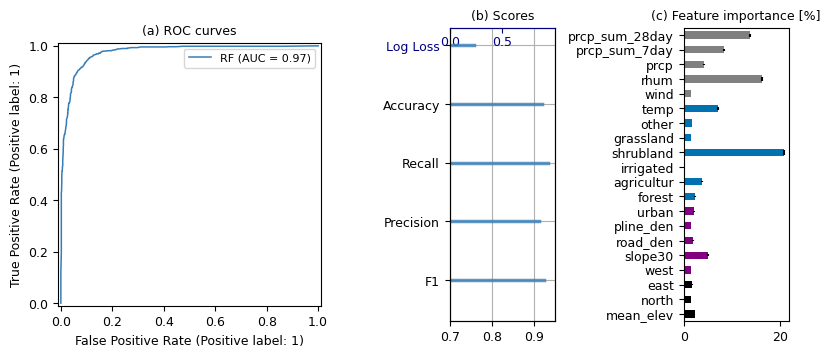

In [17]:
plt.rcParams.update({'font.size': 9})

colors = ['#377eb8', '#ff7f00', '#4daf4a',
                 '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

models = [ rfc_tuned]#, knn_tuned, lgr_tuned]
fig, ax1 = plt.subplots(1, 3, figsize = (8, 3.8),gridspec_kw={'width_ratios': [1, 0.4, 0.4]})

# Initialize lists for metrics
f1_scores, precisions, recall_scores, accuracies, log_losses = [], [], [], [], []

names = [ 'RF', 'kNN', 'LR'] 

for i, model in enumerate(models):
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)
    f1_scores.append(f1_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))
    log_losses.append(log_loss(y_test, y_pred_proba))
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test, ax = ax1[0], name = names[i], lw  = 1.1, c = colors[i])

ax1[0].legend(prop={'size': 8})   
ax1[0].set_title("(a) ROC curves", fontsize = 9)


ax2 = ax1[1].twiny()
for i in range(len(models)):
    ax1[1].plot([0.7, f1_scores[i]], [0-0.15*i,0-0.15*i], c = colors[i], lw = 2.5, alpha = 0.8)
    ax1[1].plot([0.7, precisions[i]], [1-0.15*i,1-0.15*i], c = colors[i], lw = 2.5, alpha = 0.8)
    ax1[1].plot([0.7, recall_scores[i]], [2-0.15*i,2-0.15*i], c = colors[i], lw = 2.5, alpha = 0.8)
    ax1[1].plot([0.7, accuracies[i]], [3-0.15*i,3-0.15*i], c = colors[i], lw = 2.5, alpha = 0.8)
    ax2.plot([0, log_losses[i]], [4-0.15*i,4-0.15*i], c = colors[i], lw = 2.5, alpha = 0.8)
ax1[1].set_yticks([0, 1, 2, 3, 4])
ax1[1].set_yticklabels(['F1', 'Precision', 'Recall', 'Accuracy', 'Log Loss'])
ax1[1].grid()
ax1[1].set_title("(b) Scores", fontsize = 9)

ax1[1].set_xlim(0.7, 0.95)
ax1[1].set_ylim(-0.7, 4.3)
ax2.set_xlim(0, 1)
ax2.set_xticks([0, 0.5])
ax2.tick_params(axis='x', direction='in', pad=-15, colors='navy')
ax2.spines['top'].set_color('navy')

# Get the tick labels
yticks = ax1[1].get_yticklabels()

# Customize the color of each label
for label in yticks:
    if label.get_text() == 'Log Loss':
        label.set_color('navy')  # Set 'Log Loss' to grey
    else:
        label.set_color('black')  # Set others to black
        

columns =  ['road', 'powerline', 'night lights', 'elevation', 'slope', 'East',
       'South', 'West', 'WUI', 'agriNA', 'grass', 'forest', 'shrub', 'other',
       'agri', 'temp', 'wind', 'rhum', 'prcp', '7 day prcp',
       '28 day prcp']

importances = rfc_tuned.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_tuned.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)*100

forest_importances.plot.barh(yerr=std, ax=ax1[2],color=my_colors)
ax1[2].set_title("(c) Feature importance [%]", fontsize = 9)

#ax1[2].text(11, 16, 'Weather:\n   ' +str(np.round(forest_importances[15:21].sum(),1)) + '%', c ='#808080' )
#ax1[2].text(8, 10, 'Land cover:\n    ' +str(np.round(forest_importances[8:15].sum(),1)) + '%', c ='#0072B2' )   
#ax1[2].text(7, 4, 'Topography:\n   ' +str(np.round(forest_importances[3:8].sum(),1)) + '%', c ='#800080' )   
#ax1[2].text(6.5, 0.3, 'Human \nactivity: ' +str(np.round(forest_importances[:3].sum(),1)) + '%', c ='#000000' )   
plt.tight_layout()

plt.savefig('model-selection',dpi=600)

#### 6. Save best model 

In [18]:
filename = path + 'results/all-predictors/RF_model_' + season_name +'.sav'
pickle.dump(rfc_tuned, open(filename, 'wb'))

In [19]:
from joblib import dump, load
dump(scaler, path + 'results/all-predictors/standard_scaler_' + season_name +'.bin', compress=True)

['O:/Climate-and-Energy-Policy/CERM/Projects/Wildfire/Data/ML-data-Central-Europe-gridded/results/all-predictors/standard_scaler_fire-season.bin']